<a href="https://colab.research.google.com/github/tbatsenko/ML_project/blob/master/Stock_price_prediction_Sentiment_Volatility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 20, 10
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [0]:
drive_path = '/content/drive/My Drive/ai_talon/data-analysis/'

In [0]:
stock_data = pd.read_csv(drive_path + 'bavl_data.csv')

In [0]:
ts_data = stock_data

In [0]:
ts_data['<DATE>'] = [pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']]

In [221]:
[pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']][:10]

['25.03.2009',
 '26.03.2009',
 '27.03.2009',
 '30.03.2009',
 '01.04.2009',
 '02.04.2009',
 '03.04.2009',
 '06.04.2009',
 '07.04.2009',
 '08.04.2009']

In [0]:
ts_data['<DATE>'] = pd.to_datetime(pd.Series(ts_data['<DATE>']), format="%d.%m.%Y")

In [223]:
ts_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,2009-03-25,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,2009-03-26,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,2009-03-27,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,2009-03-30,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,2009-04-01,10:00:00,0.0800,0.0810,0.0800,0.0810,790000


In [0]:
## Computing Volatility
# Load the required modules and packages
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [0]:

# Compute the logarithmic returns using the Closing price 
ts_data['Log_Ret'] = np.log(ts_data['<CLOSE>'] / ts_data['<CLOSE>'].shift(1))


In [226]:
ts_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,Log_Ret
0,BAVL,D,2009-03-25,10:00:00,0.0500,0.0500,0.0500,0.0500,40000,NaN
1,BAVL,D,2009-03-26,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000,0.482426
2,BAVL,D,2009-03-27,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000,-0.025001
3,BAVL,D,2009-03-30,10:00:00,0.0785,0.0785,0.0785,0.0785,650000,-0.006349
4,BAVL,D,2009-04-01,10:00:00,0.0800,0.0810,0.0800,0.0810,790000,0.031351


In [228]:
ts_data["Log_Ret"].rolling(20).apply(lambda x: pd.np.std(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20      0.119821
21      0.069503
22      0.070651
23      0.070816
24      0.070803
25      0.071849
26      0.065844
27      0.075676
28      0.077320
29      0.079727
          ...   
2235    0.011240
2236    0.011343
2237    0.011853
2238    0.012119
2239    0.012134
2240    0.011910
2241    0.011555
2242    0.011715
2243    0.013149
2244    0.013047
2245    0.013226
2246    0.013194
2247    0.013744
2248    0.013718
2249    0.018530
2250    0.018628
2251    0.024004
2252    0.025479
2253    0.025402
2254    0.025360
2255    0.025396
2256    0.025229
2257    0.025123
2258    0.024952
2259    0.030106
2260    0.030114
2261    0.030111
2262    0.0339

     <TICKER> <PER>     <DATE>  ...    <VOL>   Log_Ret  Volatility
2250     BAVL     D 2018-05-25  ...   470000 -0.026325    0.083307
2251     BAVL     D 2018-05-29  ...   260000  0.064267    0.107349
2252     BAVL     D 2018-05-30  ...   850000 -0.040967    0.113947
2253     BAVL     D 2018-05-31  ...   880000  0.020693    0.113601
2254     BAVL     D 2018-06-01  ...   310000 -0.001188    0.113414
2255     BAVL     D 2018-06-04  ...    10000  0.010053    0.113575
2256     BAVL     D 2018-06-05  ...   420000 -0.006197    0.112829
2257     BAVL     D 2018-06-06  ...    10000  0.005903    0.112354
2258     BAVL     D 2018-06-07  ...   430000 -0.010056    0.111587
2259     BAVL     D 2018-06-08  ...  1160000 -0.080439    0.134636
2260     BAVL     D 2018-06-11  ...  1160000 -0.003550    0.134672
2261     BAVL     D 2018-06-12  ...   780000  0.007730    0.134658
2262     BAVL     D 2018-06-13  ...  4000000 -0.079081    0.151965
2263     BAVL     D 2018-06-14  ...   690000  0.038820    0.15

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ca4eee80>,
      dtype=object)

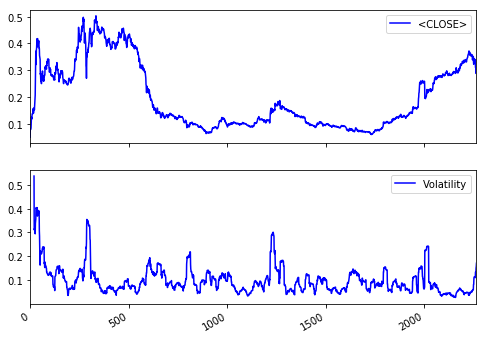

In [237]:
# Compute Volatility using the pandas rolling standard deviation function - we choose rolling window of size 20
ts_data["Volatility"] = ts_data["Log_Ret"].rolling(20).apply(lambda x: pd.np.std(x)) * np.sqrt(20)

print(ts_data.tail(15))
# Plot the Price series and the Volatility
ts_data[['<CLOSE>', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

In [238]:
ts_data.tail()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,Log_Ret,Volatility
2260,BAVL,D,2018-06-11,10:00:00,0.3210,0.3210,0.3002,0.3093,1160000,-0.003550,0.134672
2261,BAVL,D,2018-06-12,10:00:00,0.3118,0.3118,0.3030,0.3117,780000,0.007730,0.134658
2262,BAVL,D,2018-06-13,10:00:00,0.3065,0.3087,0.2880,0.2880,4000000,-0.079081,0.151965
2263,BAVL,D,2018-06-14,10:00:00,0.2998,0.3025,0.2870,0.2994,690000,0.038820,0.157979
2264,BAVL,D,2018-06-15,10:00:00,0.2999,0.3189,0.2999,0.3189,1210000,0.063097,0.171603


In [0]:
# Now the sentiment 

In [240]:
import sys
!{sys.executable} -m pip install tokenize_uk

In [0]:
news_data = pd.read_csv(drive_path + "news_data.csv", encoding='utf-8')

In [242]:
import pandas as pd
from tokenize_uk import tokenize_uk
import io
import numpy as np
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
import random
random.seed(0)
torch.manual_seed(0)

In [0]:
news_data = pd.read_csv(drive_path + 'news_data.csv')

In [244]:
news_data.head()

,Unnamed: 0,date,title,text,time,lang
0,0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru
1,1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru
2,2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru
3,3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru
4,4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru


In [0]:
price_data = pd.read_csv(drive_path + "timeseries_data.csv")
# all_data = pd.merge(price_data, news_data)

In [0]:
import csv

tone_dict_uk = {}

with open(drive_path + 'tone-dict-uk.tsv') as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
  
        tone_dict_uk[row[0]] = int(row[1])
    
tone_dict_ru = {}

with open(drive_path + 'tone-dict-ru.csv') as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
        try:  
            tone_dict_ru[row[0]] = int(row[1])
        except: 
            pass
    

In [247]:
tone_dict_uk['мрія']


1

In [248]:
tone_dict_ru['ужас']

-5

In [0]:
data = pd.read_csv(drive_path + "timeseries_data_df.csv")

In [250]:
news_data.loc[news_data.date == '2009-03-25']['text'].values[0][:20]

'\nПока даже заоблачны'

In [0]:
data['article'] = [news_data.loc[news_data.date == curr_date].text for curr_date in data.date]

In [252]:
data.head()

,date,price,article
0,2009-03-25,0.0500,304 \nПока даже заоблачные процентные ставк...
1,2009-03-26,0.0804,530 \nФонд гарантирования вкладов определи...
2,2009-03-27,0.0805,1514 \nФонд гарантирования вкладов определи...
3,2009-03-30,0.0785,"Series([], Name: text, dtype: object)"
4,2009-04-01,0.0800,324 \nНациональный банк Украины предоставил...


In [253]:
data.article = [article.values[0].lower() if article.values.any() else '' for article in data.article]
data.article = [' '.join(list(map(lambda x : x.decode('utf-8'), tokenize(article.encode('utf-8'))))) if article else '' for article in data.article]
data.head()




,date,price,article
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...
1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...
2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...
3,2009-03-30,0.0785,
4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...


In [0]:
def get_sentiment_score(text, lang):
    text_sentiment_sum = 0
    for word in text.split(' '):

        if lang == 'uk':
            try:
                text_sentiment_sum += int(tone_dict_uk[word])
            except:
                pass
        if lang == 'ru':
            try:
                text_sentiment_sum += int(tone_dict_ru[word])
            except:
                pass
                
    return text_sentiment_sum / len(text.split(' '))

In [255]:
data['lang'] = [news_data.loc[news_data.date == curr_date].lang for curr_date in data.date]
data.lang = [lang.values[0] if lang.values.any() else '-' for lang in data.lang]
data.head()

,date,price,article,lang
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...,ru
1,2009-03-26,0.0804,фонд гарантирования вкладов определил восемь б...,ru
2,2009-03-27,0.0805,фонд гарантирования вкладов определил 8 банков...,ru
3,2009-03-30,0.0785,,-
4,2009-04-01,0.0800,национальный банк украины предоставил 1 млрд г...,ru


In [0]:
data['sentiment_score'] = [get_sentiment_score(row[1].article, row[1].lang) for row in data.iterrows()]

In [257]:
data.loc[data['sentiment_score'] != 0]

,date,price,article,lang,sentiment_score
0,2009-03-25,0.0500,пока даже заоблачные процентные ставки и лояль...,ru,-0.002665
11,2009-04-10,0.1400,на кредитном рынке наметилась весенняя оттепел...,ru,0.002116
13,2009-04-14,0.1350,с начала кризиса отечественная банковская сист...,ru,0.002987
20,2009-04-24,0.1560,несколько отечественных компаний и банков не с...,ru,-0.005804
21,2009-04-27,0.1525,в украине осталось восемь стабильных банков . ...,ru,0.053476
31,2009-05-14,0.3000,австрийский raiffeisen international bank hold...,ru,0.125786
35,2009-05-20,0.4030,"согласно оперативным данным , опубликованным н...",ru,0.011601
36,2009-05-21,0.4100,наиболее надежную позицию в украине имеют «доч...,ru,0.007267
37,2009-05-22,0.4100,данные деятельности 8 крупнейших банков страны...,ru,0.041528
38,2009-05-25,0.4020,нбу начал ликвидацию первого с начала кризиса ...,ru,-0.019841


In [0]:
# Compute Volatility of Sentiment

In [0]:
## Computing Volatility
# Load the required modules and packages
import numpy as np
import pandas as pd


In [267]:
# Compute the logarithmic returns using the Sentiment score  
data['Log_Ret'] = np.log(data['sentiment_score'] / data['sentiment_score'].shift(1))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


            date   price  ...   Log_Ret Volatility
2250  2018-05-25  0.3184  ... -1.606556   1.878979
2251  2018-05-29  0.3336  ...  0.493658   1.485075
2252  2018-05-30  0.3498  ...      -inf        NaN
2253  2018-05-31  0.3252  ...       inf        NaN
2254  2018-06-01  0.3330  ...  0.793470        NaN
2255  2018-06-04  0.3399  ...      -inf        NaN
2256  2018-06-05  0.3340  ...       NaN        NaN
2257  2018-06-06  0.3398  ...       inf        NaN
2258  2018-06-07  0.3300  ...       NaN        NaN
2259  2018-06-08  0.3348  ...      -inf        NaN
2260  2018-06-11  0.3210  ...       NaN        NaN
2261  2018-06-12  0.3118  ...       NaN        NaN
2262  2018-06-13  0.3065  ...       NaN        NaN
2263  2018-06-14  0.2998  ...       inf        NaN
2264  2018-06-15  0.2999  ... -0.194365        NaN

[15 rows x 7 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c9f53278>,
      dtype=object)

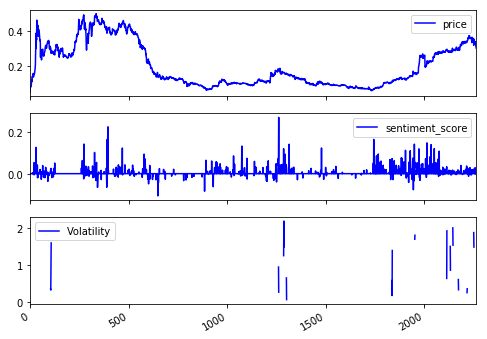

In [268]:
# Compute Volatility using the pandas rolling standard deviation function - we choose rolling window of size 20
data["Volatility"] = data["Log_Ret"].rolling(2).apply(lambda x: pd.np.std(x)) * np.sqrt(2)

print(data.tail(15))
# Plot the Price series and the Volatility
data[['price', 'sentiment_score', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

### We see that we don't have enough sentiment data for prediction.

This might be because of the rus and ukr tone dictionaries we've used are not good enough

It also is because the news data is quite sparse and not complete - we don't have news data for every day. 

And the third reason is that the news  itself are not positive / negative enough.

This is also a result, now we see we need better data :) 

In [151]:
import sys
!{sys.executable} -m pip install sklearn

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [270]:
data.tail()

,date,price,article,lang,sentiment_score,Log_Ret,Volatility
2260,2018-06-11,0.3210,,-,0.000000,NaN,NaN
2261,2018-06-12,0.3118,,-,0.000000,NaN,NaN
2262,2018-06-13,0.3065,,-,0.000000,NaN,NaN
2263,2018-06-14,0.2998,"за даними нбу , на 1 травня на рахунках в укра...",uk,0.008865,inf,NaN
2264,2018-06-15,0.2999,студенти української академії лідерства відвід...,uk,0.007299,-0.194365,NaN


In [271]:
X = data.copy()
X = X.drop(['date', 'price', 'article', 'lang', 'Volatility', 'Log_Ret'], axis=1)
y = data[['Volatility']]
y = np.ravel(y)

print(X.head())
print(y)
train_X, text_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

   sentiment_score
0        -0.002665
1         0.000000
2         0.000000
3         0.000000
4         0.000000
[nan nan nan ... nan nan nan]


In [0]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
import math

In [273]:
best_params = {
    "C": 100,
    "epsilon": 5,
}
best_svr = SVR(kernel='linear', C=best_params["C"], epsilon=best_params["epsilon"], coef0=0.1, shrinking=True,
               tol=0.001, cache_size=200, verbose=True, max_iter=10000)

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
print("MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean())))

best_svr.fit(train_X, train_y)
pred=best_svr.predict(text_X)
print(best_svr.score(text_X, test_y))
from sklearn.metrics import r2_score
print(r2_score(test_y, pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored

Model does not perform well :) :(